# 4.9 Python Visualizations Part 2

## Contents

1. Importing Libraries
2. Importing Data
3. Creating Visualizations
4. Downloading Charts

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
path = r'C:\Users\kensz\OneDrive\Desktop\CF Data Analytics Course\Achievement 4\11-2022 Instacart basket Analysis'

In [3]:
df_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products.pkl'))

In [4]:
df_cop.head(25)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,average_prices,Spending_Flag,median_order_frequency,frequency_tag,Gender,STATE,Age,n_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
5,550135,1,7,1,9,20.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
6,3108588,1,8,1,14,14.0,196,2,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
7,2295261,1,9,1,16,0.0,196,4,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
8,2550362,1,10,4,8,30.0,196,1,1,Soda,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
9,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


In [5]:
df_cop.shape

(30328763, 31)

In [6]:
df_cop.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_hours               object
busiest_period_of_day       object
max_order                    int64
loyalty flag                object
average_prices             float64
Spending_Flag               object
median_order_frequency     float64
frequency_tag               object
Gender                      object
STATE                       object
Age                          int64
n_dependants        

## 03. Creating Visualizations

Charts were created and saved to my computer while reading through the lesson

### Histogram for Hour of Day

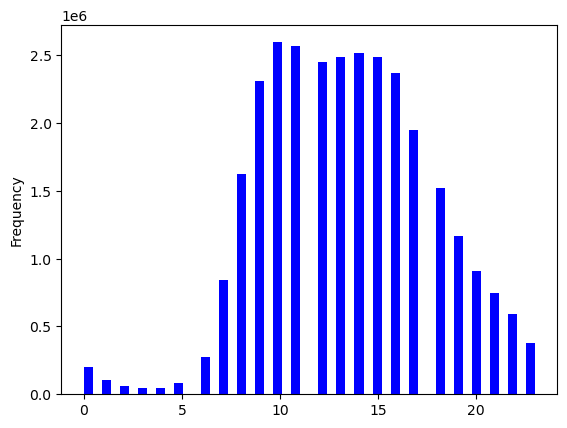

In [7]:
hours_hist = df_cop['order_hour_of_day'].plot.hist(bins = 50, color = 'blue')

The majority of orders are placed at approximately 10:00. After 17:00 orders start to fall off, with the lowest amount of orders coming inbeteen 03:00 and 05:00.

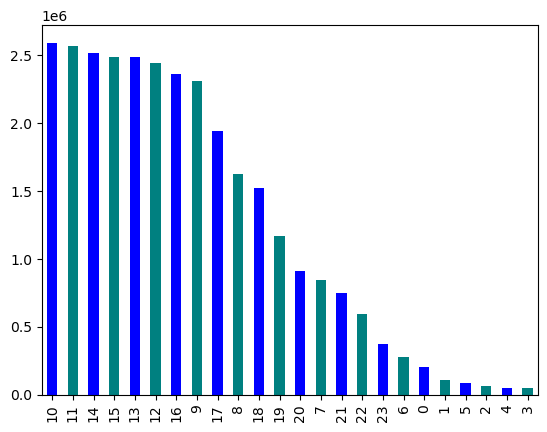

In [11]:
hours_bar = df_cop['order_hour_of_day'].value_counts().plot.bar(color = ['blue', 'teal'])

In [12]:
hours_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hours_bar.png'))

### Bar Chart for Loyalty flag

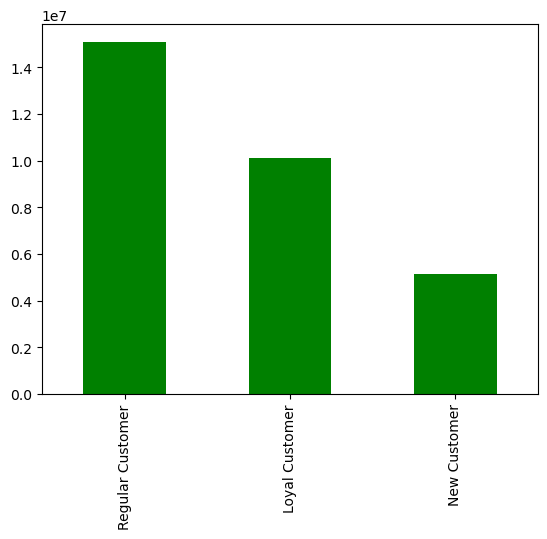

In [8]:
loyal_bar = df_cop['loyalty flag'].value_counts().plot.bar(color = 'green')

### Price to Hour Comparison Chart

In [9]:
# assigning random values for sampling

np.random.seed(8)
dev = np.random.rand(len(df_cop)) <= 0.7

In [10]:
#splitting the data into subset for sampling

big = df_cop[dev]
small = df_cop[~dev]

In [11]:
len(df_cop)

30328763

In [12]:
len(big) + len(small)

30328763

In [13]:
#creating smaller dataframe with only relevant values for chart

df_ph = small[['order_hour_of_day', 'prices']]

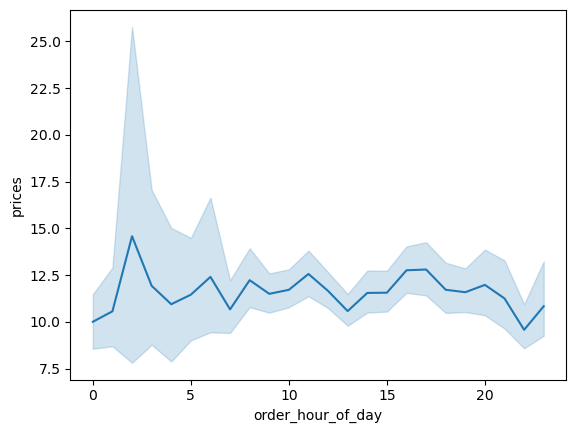

In [14]:
price_hour_line = sns.lineplot(data = df_ph, x = 'order_hour_of_day', y = 'prices')

### Customer Demographic Information

#### Age vs Number of Dependants

In [15]:
df_demo = small[['Age', 'n_dependants']]

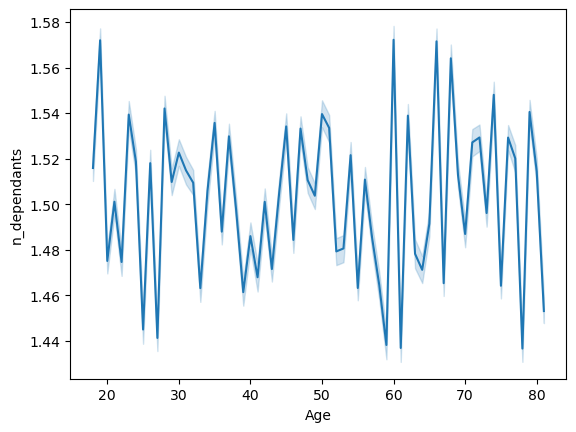

In [16]:
age_fam_line = sns.lineplot(data = df_demo, x ='Age', y = 'n_dependants')

The line chart shows that there is no correlation between age and number of dependants. That number of dependants has appears random across ages.

#### Age vs Income

In [17]:
#creating smaller df for visualization
df_income = small[['Age', 'income']]

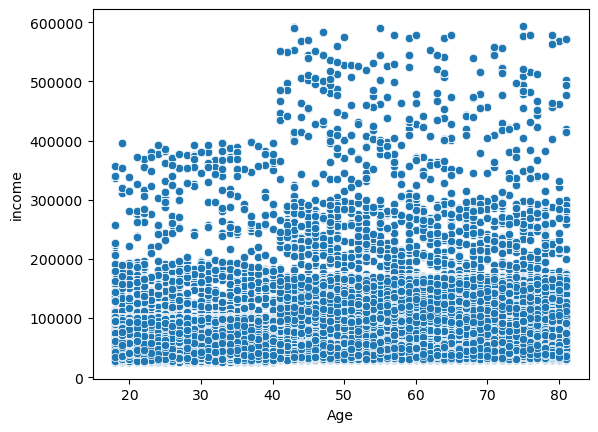

In [18]:
income_scatter = sns.scatterplot(x = 'Age', y = 'income', data = df_income)

This scatterplot reveals a few very important insights.
1. The majority of users have an annual income of less than 200,000
2. It is more likely for an older user to have a higher income than a younger user.
3. There are no users under 40 who make more than 400,000 in annual income.

## 04. Downloading Charts

In [19]:
hours_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hours_hist.png'))

In [20]:
price_hour_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_hour_line.png'))

In [21]:
age_fam_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_fam_line.png'))

In [22]:
income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_scatter.png'))

In [23]:
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_bar.png'))